In [1]:
from mylib.lib import (
    load_dataset,
    calculate_summaries,
    create_bar_chart,
    create_histogram,
)

# Data
dataset_path = "https://raw.githubusercontent.com/fivethirtyeight/data/master/urbanization-index/urbanization-census-tract.csv"

In [2]:
dataset = load_dataset(dataset_path)
assert dataset is not None
assert dataset.shape == (73280, 8)
dataset.tail()

,statefips,state,gisjoin,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex
73275,72,Puerto Rico,G7201530750501,18.03124,-66.86725,6011,52155.0,10.86198
73276,72,Puerto Rico,G7201530750502,18.02477,-66.86044,2342,55257.0,10.91975
73277,72,Puerto Rico,G7201530750503,18.02527,-66.87763,2218,48423.0,10.78773
73278,72,Puerto Rico,G7201530750601,18.01738,-66.83936,4380,50600.0,10.83171
73279,72,Puerto Rico,G7201530750602,17.98674,-66.85192,3001,44921.0,10.71266


In [3]:
my_calculated_summaries = calculate_summaries(
    dataset, "population", "Population", "urbanindex", "Urban Index", True
)
pandas_summaries = dataset.describe()
assert (
    pandas_summaries.loc["mean", "population"]
    == my_calculated_summaries.loc["Mean", "Population"]
)
assert (
    pandas_summaries.loc["std", "population"]
    == my_calculated_summaries.loc["Standard Deviation", "Population"]
)
assert (
    pandas_summaries.loc["min", "population"]
    == my_calculated_summaries.loc["Min", "Population"]
)
assert (
    pandas_summaries.loc["max", "population"]
    == my_calculated_summaries.loc["Max", "Population"]
)
# Not setting first column as an index for better visual effect
calculate_summaries(dataset, "population", "Population", "urbanindex", "Urban Index")

,Statistic,Population,Urban Index
0,Count,73280.000000,73280.000000
1,Mean,4426.168927,11.041972
2,Median,4126.000000,11.616885
3,Max,65528.000000,14.997230
4,Min,2.000000,-0.297768
5,Standard Deviation,2198.083466,2.081913


# Population Bar Chart

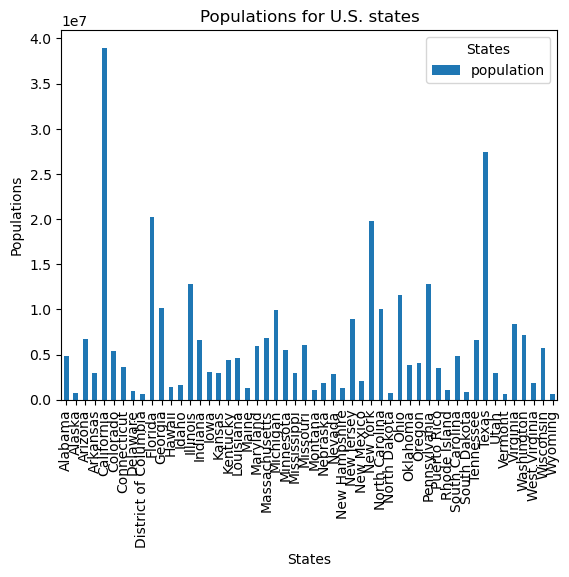

In [4]:
population_sums = dataset.groupby(["state"])["population"].sum()
create_bar_chart(
    population_sums, "Populations for U.S. states", "States", "Populations", False
)

# Population Histogram

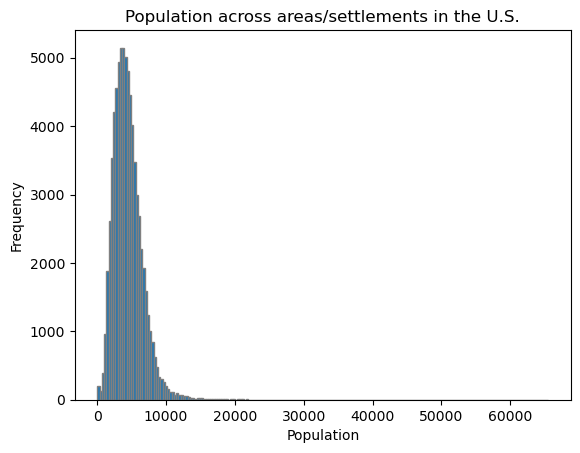

In [5]:
create_histogram(
    dataset,
    "population",
    "Population across areas/settlements in the U.S.",
    "Frequency",
    False,
)